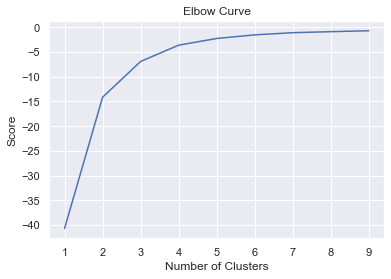

[[  51.12400508 -114.04349586]
 [  51.01692525 -114.07965993]
 [  51.09759817 -114.16786291]
 [  50.93429706 -114.00654219]
 [  51.06177169 -113.9799296 ]]


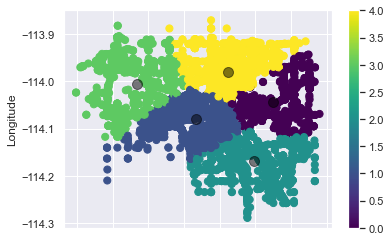

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import os 

#Read map
os.chdir("C:\dataset")
df = pd.read_csv("TrafficIn2.csv")

#clean dataset and drop null values
df = df.loc[:,['INCIDENT INFO','Longitude','Latitude','DewPoint','RelativeHumidity','WindDirection','WindSpeed','Visibility','Pressure','Weather']]
df = df.dropna()

#find columns in dataset
X = df.loc[:,['INCIDENT INFO','Latitude','Longitude']]


K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)

plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

X = X[['INCIDENT INFO','cluster_label']]

f_data = df.merge(X, left_on='INCIDENT INFO', right_on='INCIDENT INFO')

f_data.to_csv ('f_data.csv', index=None, header = True)

centers = kmeans.cluster_centers_
print(centers)